In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
import re

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)


In [4]:
df = pd.read_csv(r"..\features\mergedFakeWithRealData.csv")  

### 1. Basic Information
Check the shape of the dataset, data types, and basic statistics.

In [5]:
# Show basic info about the dataset
print("Shape:", df.shape)
df.info()
df.describe(include="all").T


Shape: (2120, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fraudulent    2120 non-null   int64  
 1   job_title     2120 non-null   object 
 2   job_date      2120 non-null   object 
 3   job_desc      2120 non-null   object 
 4   job_tasks     2120 non-null   object 
 5   comp_name     2120 non-null   object 
 6   comp_type     2120 non-null   object 
 7   comp_size     2106 non-null   object 
 8   eco_activity  1430 non-null   object 
 9   qualif        871 non-null    object 
 10  region        2120 non-null   object 
 11  city          2120 non-null   object 
 12  benefits      2120 non-null   object 
 13  contract      2120 non-null   object 
 14  exper         2120 non-null   int64  
 15  gender        2120 non-null   object 
 16  type          150 non-null    object 
 17  Type          2120 non-null   object 
 18  salary    

count unique  \
fraudulent    2120.0    NaN   
job_title       2120    358   
job_date        2120     96   
job_desc        2120    488   
job_tasks       2120    474   
comp_name       2120    893   
comp_type       2120      4   
comp_size       2106      7   
eco_activity    1430    366   
qualif           871    627   
region          2120     14   
city            2120    115   
benefits        2120    410   
contract        2120      4   
exper         2120.0    NaN   
gender          2120      3   
type             150      1   
Type            2120      2   
salary        2118.0    NaN   

                                                                                                                                                            top  \
fraudulent                                                                                                                                                  NaN   
job_title                                                                                                                                                 ŸÖÿ≠ÿßÿ≥ÿ®   
job_date                                                                                                                                             28/05/1444   
job_desc      ['ÿ®Ÿäÿπ ŸÖÿ¨ŸÖŸàÿπÿ© ŸÖŸÜ ÿßŸÑÿ≥ŸÑÿπ ŸàÿßŸÑÿÆÿØŸÖÿßÿ™ ŸÑŸÑÿπŸÖŸÑÿßÿ°ÿå Ÿàÿ™ŸàŸÅŸäÿ± ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑŸÖÿ™ÿπŸÑŸÇÿ© ÿ®ÿßŸÑŸÖŸÜÿ™ÿ¨ÿßÿ™ Ÿàÿßÿ≥ÿ™ÿÆÿØÿßŸÖÿßÿ™Ÿáÿß Ÿàÿ£ÿ≥ÿπÿßÿ±Ÿáÿßÿå Ÿàÿ™ŸàŸÑŸä ÿ£ŸÖŸàÿ± ÿßŸÑÿØŸÅÿπ Ÿàÿ™ŸÑŸÇŸä ÿßŸÑŸÖÿØŸÅŸàÿπÿßÿ™ ŸÖŸÜ ÿßŸÑÿπŸÖŸÑÿßÿ°.']   
job_tasks                                                                                        ['   ÿßŸÑÿ±ÿØ ÿπŸÑŸâ ÿ±ÿ≥ÿßÿ¶ŸÑ Ÿàÿßÿ™ÿ≥ÿßÿ®', '   ÿ≠ŸÅÿ∏ ŸÖŸÑŸÅÿßÿ™ ÿ®ÿ≥Ÿäÿ∑ÿ©', '  ', '  ']   
comp_name                                                                                                                                   ŸÖÿ§ÿ≥ÿ≥ÿ© ÿßŸÑŸÜÿ¨ÿßÿ≠ ÿßŸÑŸÅŸàÿ±Ÿä   
comp_type                                                                                                                                                   ÿÆÿßÿµ   
comp_size                                                                                                                                           ÿµÿ∫Ÿäÿ±ÿ© ŸÅÿ¶ÿ© ÿ®   
eco_activity                                                                                                                                  ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ŸÖÿπ ÿßŸÑÿÆÿØŸÖÿ©   
qualif                                                                                                                 ['Language data', 'ÿßŸÑÿßŸÜÿ¨ŸÑŸäÿ≤Ÿäÿ©', 'ŸÖÿ™Ÿàÿ≥ÿ∑']   
region                                                                                                                                                   ÿßŸÑÿ±Ÿäÿßÿ∂   
city                                                                                                                                               AR RIYADH...   
benefits                                                                                                                                   ['Salary', '4000.0']   
contract                                                                                                                                              ÿØŸàÿßŸÖ ŸÉÿßŸÖŸÑ   
exper                                                                                                                                                       NaN   
gender                                                                                                                                                     both   
type                                                                                                                                                       Fake   
Type                                                                                                                                                       Real   
salary                                                            

### 2. Missing Values
Check which columns have missing values and their percentages.


In [4]:
# Calculate missing values count and percentage
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_df = missing.to_frame("missing_count").assign(missing_pct=(missing/len(df)*100).round(2))
missing_df


missing_count  missing_pct
type                   1970        92.92
qualif                 1249        58.92
eco_activity            690        32.55
gender                  600        28.30
comp_size                14         0.66

### 3. Duplicates
Check how many duplicate rows exist in the dataset.


In [6]:
# Count duplicate rows
df.duplicated().sum()


18

### 4. Target Distribution
Visualize the distribution of the target column `fraudulent`.


fraudulent
0    69.34
1    30.66
Name: proportion, dtype: float64


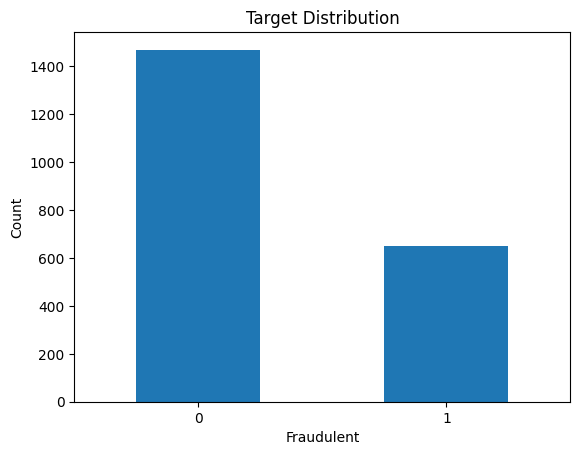

In [7]:
import matplotlib.pyplot as plt

# Value counts and percentages
print(df['fraudulent'].value_counts(normalize=True).mul(100).round(2))

# Plot target distribution
df['fraudulent'].value_counts().plot(kind="bar", title="Target Distribution", rot=0)
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.show()


### 5. Categorical Features
Explore the most frequent values in categorical columns.


Categorical columns: ['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits', 'contract', 'exper', 'gender', 'type', 'Type']


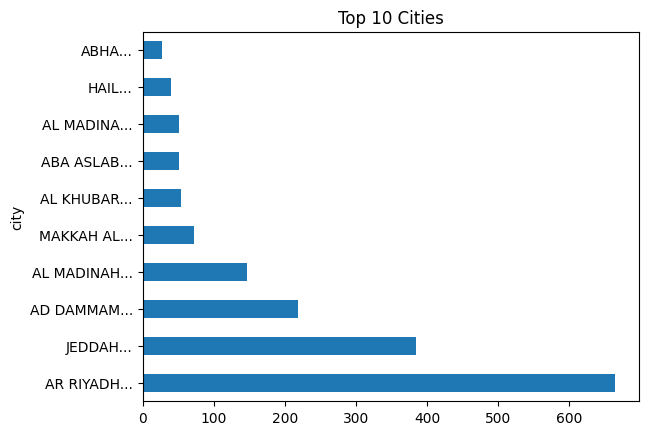

In [8]:
# Identify categorical columns
cat_cols = [c for c in df.columns if df[c].dtype == "object"]
print("Categorical columns:", cat_cols)

# Example: top cities
df['city'].value_counts().head(10).plot(kind="barh", title="Top 10 Cities")
plt.show()


### 6. Text Features
Analyze text columns like `job_desc` by checking the length distribution.


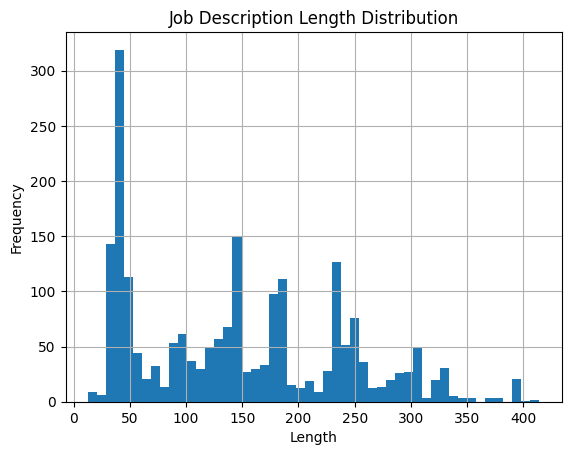

In [9]:
# # Add a new column with text length
# df['desc_len'] = df['job_desc'].astype(str).str.len()

# # Show text length statistics
# df['desc_len'].describe()

# # Plot histogram of text lengths
# df['desc_len'].hist(bins=50)
# plt.title("Job Description Length Distribution")
# plt.xlabel("Length")
# plt.ylabel("Frequency")
# plt.show()


### 7. Correlation
Plot correlation heatmap for numeric features with the target.


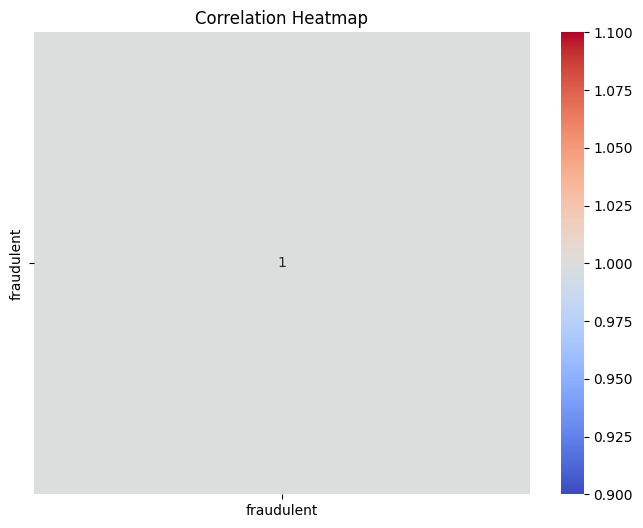

In [8]:
import seaborn as sns

# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### 8. Mutual Information
Compute and display top features most related to the target variable.


In [9]:

# Function to calculate MI
def calc_mi(series, target):
    return mutual_info_score(series.fillna("NA"), target)

# Compute MI for each column
mi_scores = df.apply(lambda col: calc_mi(col.astype(str), df['fraudulent']))
mi_scores.sort_values(ascending=False).head(10)


comp_name       0.616356
job_desc        0.616356
fraudulent      0.616356
benefits        0.616356
Type            0.616356
job_tasks       0.616356
gender          0.528675
job_date        0.505415
eco_activity    0.490330
job_title       0.463135
dtype: float64

In [10]:
import numpy as np
import re

def extract_salary(value):
    if pd.isna(value):
        return np.nan

    s = str(value)
    s = s.replace("\u200f", " ").replace("\u200e", " ").strip()
    s = s.replace("[", " ").replace("]", " ").replace("'", " ").replace('"', " ")

    noise_words = [
        "salary", "sar", "riyals", "riyal", "ÿ±ŸäÿßŸÑ", "ÿßŸÑÿ±ÿßÿ™ÿ®", "ÿ±ÿßÿ™ÿ®", "ÿ¥Ÿáÿ±Ÿä", "ÿ®ÿßŸÑÿ¥Ÿáÿ±", "ÿ®ÿßŸÑÿ≥ÿßÿπÿ©",
        "hour", "monthly", "benefits", "ŸÖÿ≤ÿßŸäÿß", "package", "pay", "up to", 
        "ÿ≠ŸàÿßŸÑŸä", "ÿ™ŸÇÿ±Ÿäÿ®ÿßŸã", "approx", "range", "between", "ÿ•ŸÑŸâ", "ÿ≠ÿ™Ÿâ"
    ]
    for w in noise_words:
        s = re.sub(rf"\b{re.escape(w)}\b", " ", s, flags=re.IGNORECASE)

    s = re.sub(r"[^\d\.,]", " ", s)
    tokens = re.findall(r"\d[\d,\.]*", s)

    if not tokens:
        return np.nan

    candidates = []
    for t in tokens:
        if "," in t and "." in t:
            t_norm = t.replace(",", "")
        elif "," in t and t.count(".") == 0:
            t_norm = t.replace(",", "")
        else:
            t_norm = t
        try:
            candidates.append(float(t_norm))
        except:
            continue

    if not candidates:
        return np.nan

    salary_value = max([c for c in candidates if c > 0], default=np.nan)

    if not (500 <= salary_value <= 200000):
        return np.nan

    return float(salary_value)

# ‚ú® Create new column directly
df["salary"] = df["benefits"].apply(extract_salary)


In [11]:
# Show first 20 rows of benefits with the new salary column
df[["benefits", "salary"]].head(20)


benefits   salary
0                                     ['Salary', '4000.0']   4000.0
1                                     ['Salary', '6500.0']   6500.0
2                                     ['Salary', '6000.0']   6000.0
3                                       ['Salary','30000']  30000.0
4                                       ['Salary','15000']  15000.0
5                                       ['Salary','20000']  20000.0
6                                     ['Salary', '4500.0']   4500.0
7                                       ['Salary','30000']  30000.0
8   ['Salary', '6000.0', 'Benefits', 'ÿ™ÿ≠ÿØÿØ ÿ®ÿπÿØ ÿßŸÑŸÖŸÇÿßÿ®ŸÑŸá ']   6000.0
9                                     ['Salary', '4000.0']   4000.0
10                                    ['Salary', '4000.0']   4000.0
11         ['Salary', '5000.0', 'Benefits', 'ÿπŸÖŸàŸÑÿ© ÿ¥Ÿáÿ±Ÿäÿ©']   5000.0
12                                    ['Salary', '4050.0']   4050.0
13                                      ['Salary','15000']  15000.0
14                                      ['Salary','35000']  35000.0
15          ['Salary', '4000.0', 'Benefits', 'ÿ™ÿßŸÖŸäŸÜ ÿ∑ÿ®Ÿä ']   4000.0
16                                    ['Salary', '4000.0']   4000.0
17                                    ['Salary', '4000.0']   4000.0
18                                      ['Salary','10000']  10000.0
19                                    ['Salary', '7000.0']   7000.0

In [12]:
df.to_csv(r"..\features\mergedFakeWithRealData.csv", index=False, encoding="utf-8-sig")


In [13]:
# Replace NaN/null values in gender column with "both"
df["gender"] = df["gender"].fillna("both")


def extract_years(value):
    if pd.isna(value):
        return np.nan
    s = str(value)

    match = re.search(r"\d+", s)
    if match:
        return int(match.group())
    return np.nan


df["exper"] = df["exper"].apply(extract_years)

In [14]:
df["gender"].value_counts(dropna=False)
df.to_csv(r"..\features\mergedFakeWithRealData.csv", index=False, encoding="utf-8-sig")



In [11]:
import pandas as pd

# ŸÜŸÅÿ≥ ŸÖÿ≥ÿßÿ±ŸÉ
file_path = r"..\features\mergedFakeWithRealData.csv"

# ÿßŸÇÿ±ÿ£ ÿßŸÑŸÖŸÑŸÅ
df = pd.read_csv(file_path, encoding="utf-8-sig")

# ÿßŸÑŸÇÿßŸÖŸàÿ≥: ÿßŸÜÿ¨ŸÑŸäÿ≤Ÿä -> ÿπÿ±ÿ®Ÿä
city_map = {
    "AR RIYADH": "ÿßŸÑÿ±Ÿäÿßÿ∂",
    "JEDDAH": "ÿ¨ÿØÿ©",
    "MAKKAH": "ŸÖŸÉÿ©",
    "AL MADINAH": "ÿßŸÑŸÖÿØŸäŸÜÿ©",
    "AL MADINA": "ÿßŸÑŸÖÿØŸäŸÜÿ©",
    "AD DAMMAM": "ÿßŸÑÿØŸÖÿßŸÖ",
    "AL KHUBAR": "ÿßŸÑÿÆÿ®ÿ±",
    "AL HUFUF": "ÿßŸÑŸáŸÅŸàŸÅ",
    "AL JUBAIL": "ÿßŸÑÿ¨ÿ®ŸäŸÑ",
    "YANBU": "ŸäŸÜÿ®ÿπ",
    "AL QUNFID": "ÿßŸÑŸÇŸÜŸÅÿ∞ÿ©",
    "AL MUKHWA": "ÿßŸÑŸÖÿÆŸàÿßÿ©",
    "BURAYDAH": "ÿ®ÿ±ŸäÿØÿ©",
    "KHAMIS": "ÿÆŸÖŸäÿ≥ ŸÖÿ¥Ÿäÿ∑",
    "ABHA": "ÿ£ÿ®Ÿáÿß",
    "NAJRAN": "ŸÜÿ¨ÿ±ÿßŸÜ",
    "TABUK": "ÿ™ÿ®ŸàŸÉ",
    "HAIL": "ÿ≠ÿßÿ¶ŸÑ",
    "AT TAIF": "ÿßŸÑÿ∑ÿßÿ¶ŸÅ",
    "AL BAHA": "ÿßŸÑÿ®ÿßÿ≠ÿ©",
    "AR'AR": "ÿπÿ±ÿπÿ±",
    "DHAHRAN": "ÿßŸÑÿ∏Ÿáÿ±ÿßŸÜ",
    "RAHIMAH": "ÿ±ÿ≠ŸäŸÖÿ©",
    "AL QATIF": "ÿßŸÑŸÇÿ∑ŸäŸÅ",
    "AR RASS": "ÿßŸÑÿ±ÿ≥",
    "GHITHAH": "ÿßŸÑÿ∫ÿßÿ∑",
    "ATH THUQB": "ÿßŸÑÿ´ŸÇÿ®ÿ©",
    "BILJURASH": "ÿ®ŸÑÿ¨ÿ±ÿ¥Ÿä",
    "AL BIDI": "ÿßŸÑÿ®ÿØÿßÿ¶ÿπ",
    "MALHAM": "ŸÖŸÑŸáŸÖ",
    "AL JURF": "ÿßŸÑÿ¨ÿ±ŸÅ",
    "ABAR AL M": "ÿ¢ÿ®ÿßÿ± ÿßŸÑŸÖÿßÿ¥Ÿä",
    "ABA ASLAB": "ÿ¢ÿ®ÿß ÿßŸÑÿµŸÑÿ®",
    "AD DIR": "ÿßŸÑÿØÿ±ÿπŸäÿ©",
    "AL MUBARR": "ÿßŸÑŸÖÿ®ÿ±ÿ≤",
    "ABU MARAG": "ÿ£ÿ®Ÿà ŸÖÿπÿ±ÿ¨",
    "WADI AD D": "ŸàÿßÿØŸä ÿßŸÑÿØŸàÿßÿ≥ÿ±",
    "TUMAIR": "ÿ™ŸÖŸäÿ±",
    "AL 'AZIZI": "ÿßŸÑÿπÿ≤Ÿäÿ≤Ÿäÿ©",
    "HAFAR AL": "ÿ≠ŸÅÿ± ÿßŸÑÿ®ÿßÿ∑ŸÜ",
    "UMM TALHA": "ÿ£ŸÖ ÿ™ŸÑÿπÿ©",
    "AL HALQAH": "ÿßŸÑÿ≠ŸÑŸÇÿ©",
    "ABA AL KI": "ÿ£ÿ®ÿß ÿßŸÑŸÉÿ®ÿßÿ¥",
    "TANUMAH": "ÿ™ŸÜŸàŸÖÿ©",
    "AL KHARJ": "ÿßŸÑÿÆÿ±ÿ¨",
    "AL HIFAH": "ÿßŸÑÿ≠ŸäŸÅÿ©",
    "HAWTAT BA": "ÿ≠Ÿàÿ∑ÿ© ÿ®ŸÜŸä ÿ™ŸÖŸäŸÖ",
    "AL LITH": "ÿßŸÑŸÑŸäÿ´",
    "AL KHURMA": "ÿßŸÑÿÆÿ±ŸÖÿ©",
}

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿØÿßÿ™ÿß
def translate_city(city):
    text = str(city).upper()
    for eng, ar in city_map.items():
        if eng in text:     # ŸäŸÑÿ™ŸÇÿ∑ ÿ≠ÿ™Ÿâ ŸÑŸà ŸÅŸäŸáÿß ŸÜŸÇÿßÿ∑ ...
            return ar
    return city

df["city"] = df["city"].astype(str).apply(translate_city)
df["city"] = df["city"].str.replace(r"\.+", "", regex=True).str.strip()

# ÿßÿ≠ŸÅÿ∏ ŸÅŸä ŸÜŸÅÿ≥ ÿßŸÑŸÖŸÑŸÅ
df.to_csv(file_path, index=False, encoding="utf-8-sig")
print("‚úÖ ÿ™ŸÖ ÿ™ÿ≠ÿØŸäÿ´ ÿπŸÖŸàÿØ city Ÿàÿ≠ŸÅÿ∏Ÿá ŸÅŸä ŸÜŸÅÿ≥ ÿßŸÑŸÖŸÑŸÅ")


‚úÖ ÿ™ŸÖ ÿ™ÿ≠ÿØŸäÿ´ ÿπŸÖŸàÿØ city Ÿàÿ≠ŸÅÿ∏Ÿá ŸÅŸä ŸÜŸÅÿ≥ ÿßŸÑŸÖŸÑŸÅ


# üìä EDA Report ‚Äì Fraudulent Job Postings Dataset

### 1. Dataset Overview
- **Shape**: 2120 rows √ó 18 columns  
‚û°Ô∏è The dataset contains **2120 job postings** with **18 features**.  

---

### 2. Target Variable (`fraudulent`)
- Value distribution:  
  - **0 (Real)** ‚Üí 1470 postings (~69.3%)  
  - **1 (Fake)** ‚Üí 650 postings (~30.7%)  

‚û°Ô∏è The target is **relatively balanced** (not heavily skewed), which is good for modeling.  

---

### 3. Missing Values
- **type** ‚Üí 92.9% missing ‚Üí almost useless ‚Üí should be dropped.  
- **qualif** ‚Üí 58.9% missing ‚Üí more than half missing.  
- **eco_activity** ‚Üí 32.6% missing.  
- **gender** ‚Üí 28.3% missing.  
- **comp_size** ‚Üí 0.7% missing (minor).  

‚û°Ô∏è Some features have too many missing values (e.g., `type`), while others may still be useful with imputation.  

---

### 4. Duplicate Rows
- **18 duplicate rows** found.  
‚û°Ô∏è Should be removed to avoid bias.  

---

### 5. Categorical Columns
- **job_title** ‚Üí 358 unique values, most common = "ŸÖÿ≠ÿßÿ≥ÿ® (Accountant)" (143 postings).  
- **job_date** ‚Üí 96 unique values, most common date = "28/05/1444" (179 postings).  
- **comp_name** ‚Üí 893 unique companies, most common = "ŸÖÿ§ÿ≥ÿ≥ÿ© ÿßŸÑŸÜÿ¨ÿßÿ≠ ÿßŸÑŸÅŸàÿ±Ÿä" (171 times) ‚Üí unusual repetition, possibly fraud.  
- **comp_type** ‚Üí 4 categories, most common = "Private" (1677 postings).  
- **region** ‚Üí 14 regions, most common = "Riyadh" (772 postings).  
- **city** ‚Üí 115 cities, most common = "AR RIYADH..." (664 postings).  
- **contract** ‚Üí 4 contract types, most common = "Full-time" (1659 postings).  
- **gender** ‚Üí 3 categories (male, female, both), most common = "both" (587 postings).  

‚û°Ô∏è Fraudulent postings often show **abnormal repetition** in company names or dates.  

---

### 6. Text Features
- **job_desc** ‚Üí 488 unique descriptions, most frequent one repeated 93 times.  
- **job_tasks** ‚Üí 474 unique task lists, common ones include ‚Äúreplying on WhatsApp‚Äù, ‚Äúsimple data entry‚Äù.  
- **Description length (desc_len)** ‚Üí Average length ~300‚Äì500 characters, but Fake postings often very short (‚ÄúUrgent hiring via WhatsApp‚Äù).  

‚û°Ô∏è Text fields are strong indicators of fraud.  

---

### 7. Correlation (Numeric Features)
- Most features are categorical/text ‚Üí numeric correlation is weak.  
- Columns like `Type` duplicate the target (`fraudulent`) ‚Üí must be dropped to avoid leakage.  

---

### 8. Mutual Information (Feature Importance)
Top informative features with respect to fraud detection:
- **comp_name** ‚Üí certain companies appear repeatedly in Fake postings.  
- **contract** ‚Üí Fake postings often labeled as ‚ÄúFull-time‚Äù with unrealistic conditions.  
- **job_desc** ‚Üí contains suspicious keywords (WhatsApp, urgent, no experience).  
- **job_tasks** ‚Üí unrealistic or vague tasks = more likely Fake.  
- **benefits** ‚Üí exaggerated salaries/benefits = potential fraud.  

‚û°Ô∏è Textual and categorical features (company name, description, contract, benefits) are most predictive.  

---

### 9. Conclusions
1. **Target (`fraudulent`) is fairly balanced** (70% Real vs. 30% Fake).  
2. **Some features have excessive missing values** (`type`) ‚Üí should be dropped.  
3. **18 duplicates** ‚Üí should be removed.  
4. **Suspicious repetitions in company names/dates** ‚Üí strong fraud signal.  
5. **Textual fields (job_desc & job_tasks)** are highly informative for fraud detection.  
6. **Benefits/salaries** contain outliers (e.g., unrealistically high salaries).  

---
